#**Titanic Passanger Survival Analysis**

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

Let's import the data first.

In [2]:
from google.colab import files
file = files.upload()

Saving titanic.csv to titanic (1).csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Let's try some EDA.

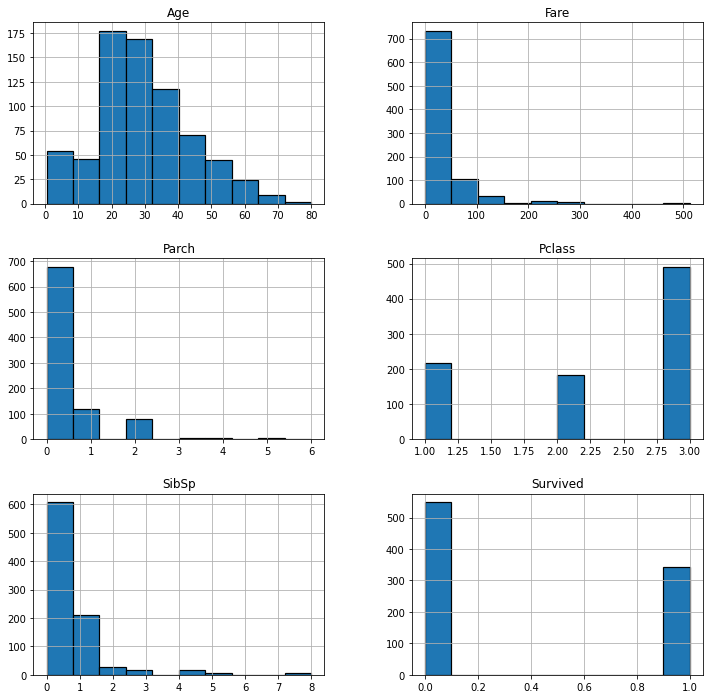

In [7]:
titanic.drop('PassengerId', axis = 1).hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

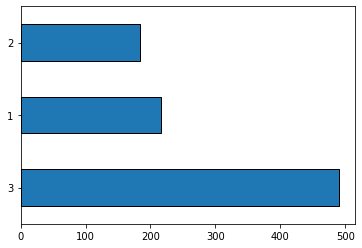

In [8]:
titanic.Pclass.value_counts().plot(kind="barh", edgecolor='black')

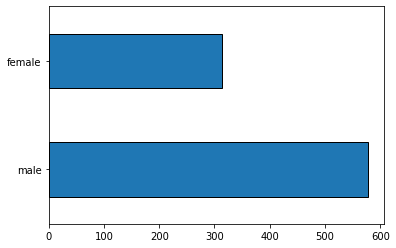

In [9]:
titanic.Sex.value_counts().plot(kind="barh", edgecolor='black')

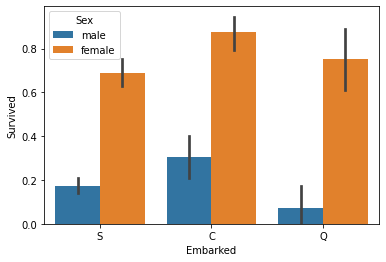

In [10]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic)

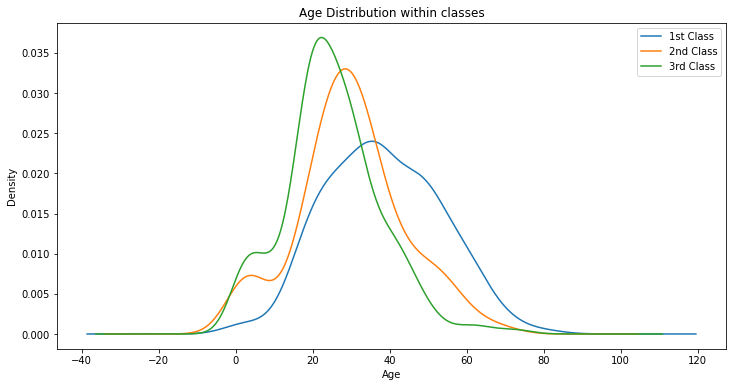

In [11]:
plt.figure(figsize=(12,6))
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'), loc='best') 
plt.show()

In [12]:
pd.crosstab([titanic.Sex, titanic.Pclass], titanic.Survived, margins = False)

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

(-1.0, 2.0)

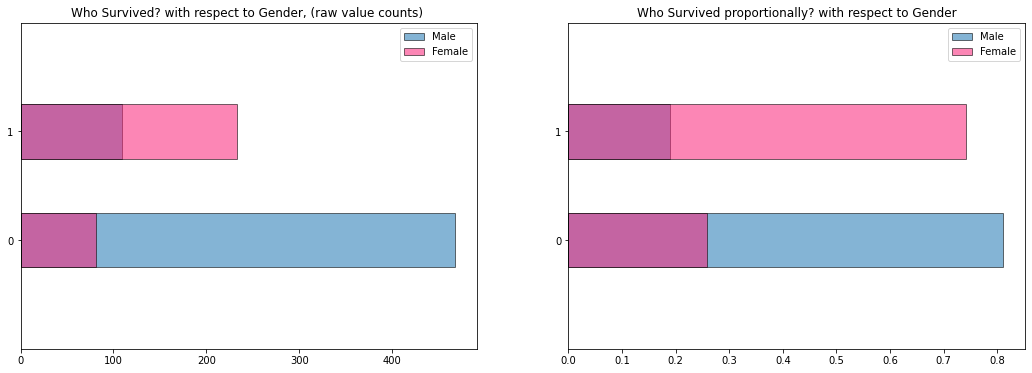

In [13]:
fig = plt.figure(figsize=(18,6))

titanic_male = titanic.Survived[titanic.Sex == 'male'].value_counts().sort_index()
titanic_female = titanic.Survived[titanic.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
titanic_male.plot(kind='barh',label='Male', alpha=0.55, edgecolor='black')
titanic_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55, edgecolor='black')
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

ax2 = fig.add_subplot(122)
(titanic_male/float(titanic_male.sum())).plot(kind='barh',label='Male', alpha=0.55, edgecolor='black')  
(titanic_female/float(titanic_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55, edgecolor='black')
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

In [14]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = titanic.Survived[titanic.Sex == 'female'][titanic.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level, edgecolor='black')
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = titanic.Survived[titanic.Sex == 'female'][titanic.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level, edgecolor='black')
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = titanic.Survived[titanic.Sex == 'male'][titanic.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level, edgecolor='black')
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = titanic.Survived[titanic.Sex == 'male'][titanic.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue', edgecolor='black')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

plt.show()

In [15]:
fig = plt.figure(figsize=(18,12), dpi = 1600)
a = 0.65

ax1 = fig.add_subplot(341)
titanic.Survived.value_counts().plot(kind='bar', color="blue", alpha=a, edgecolor='black')
ax1.set_xlim(-1, len(titanic.Survived.value_counts()))
plt.title("Step. 1")

ax2 = fig.add_subplot(345)
titanic.Survived[titanic.Sex == 'male'].value_counts().plot(kind='bar',label='Male', edgecolor='black')
titanic.Survived[titanic.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female', edgecolor='black')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survived? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(titanic.Survived[titanic.Sex == 'male'].value_counts()/float(titanic.Sex[titanic.Sex == 'male'].size)).plot(kind='bar',label='Male', edgecolor='black')
(titanic.Survived[titanic.Sex == 'female'].value_counts()/float(titanic.Sex[titanic.Sex == 'female'].size)).plot(kind='bar', edgecolor='black', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')

ax4 = fig.add_subplot(349)
female_highclass = titanic.Survived[titanic.Sex == 'female'][titanic.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a, edgecolor='black')
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = titanic.Survived[titanic.Sex == 'female'][titanic.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a, edgecolor='black')
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = titanic.Survived[titanic.Sex == 'male'][titanic.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a, edgecolor='black')
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = titanic.Survived[titanic.Sex == 'male'][titanic.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue', edgecolor='black')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

plt.show()

### Model Building

Here I've experimented a little. Cross validation is applied with all the models here, except the deep neural network.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

Some Necessary Cleanings.

In [17]:
titanic['Age'] = titanic.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
titanic['Fare'] = titanic.loc[(titanic['Pclass'] == 3) & (titanic['SibSp'] == 0) & (titanic['Embarked'] == 'S')]['Fare'].median()
titanic.loc[titanic['Embarked'].isnull(), 'Embarked'] = 'S'

In [18]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [19]:
titanic_clean = MultiColumnLabelEncoder(columns = ['Sex', 'Embarked']).fit_transform(titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1))
titanic_clean.head()

Survived  Pclass  Sex   Age  SibSp  Parch   Fare  Embarked
0         0       3    1  22.0      1      0  7.925         2
1         1       1    0  38.0      1      0  7.925         0
2         1       3    0  26.0      0      0  7.925         2
3         1       1    0  35.0      1      0  7.925         2
4         0       3    1  35.0      0      0  7.925         2

In [20]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [21]:
features = StandardScaler().fit_transform(titanic_clean.drop('Survived', axis=1))
response = titanic_clean.Survived

**Logistic Regression**

As the respose variable is binary, trying the Logistic Regression Model is sort of mandatory.

In [22]:
log = LogisticRegressionCV()
log_score = cross_val_score(log, features, response, cv=k_fold, n_jobs=1, scoring='accuracy')
print(log_score)

[0.81111111 0.79775281 0.80898876 0.79775281 0.80898876 0.80898876
 0.7752809  0.80898876 0.82022472 0.83146067]


**K-Nearest Neighbor**

Let's try a K-Nearest Neighbor Model too.

In [24]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn_score = cross_val_score(knn, features, response, cv=k_fold, n_jobs=1, scoring='accuracy')
print(knn_score)

[0.85555556 0.84269663 0.83146067 0.82022472 0.83146067 0.80898876
 0.78651685 0.7752809  0.79775281 0.82022472]


**MASHUP**

Let's have some fun!!

Here I'll try a bunch of models. Let's see which one gives better accuracy.

In [25]:
models = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1, max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]

def model_fit():
    scoring = 'accuracy'
    for i in range(len(models)):
        score = cross_val_score(models[i], features, response, cv=k_fold, n_jobs=1, scoring='accuracy')
        print("Score of Model",i,":",round(np.mean(score)*100,2))

In [26]:
model_fit()

Score of Model 0 : 81.7
Score of Model 1 : 78.79
Score of Model 2 : 79.57
Score of Model 3 : 78.22
Score of Model 4 : 82.38
Score of Model 5 : 77.78
Score of Model 6 : 80.81
Score of Model 7 : 81.03
Score of Model 8 : 78.9


**Deep Neural Network**

Finally, Let's try a DNN Model. Here I've used 2 dense hidden layers with linear activation and a 20% dropout layer, followed by an output layer with sigmoid activation, as the reponse is binary.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
model = Sequential()
model.add(Dense(8, input_dim=features.shape[1], activation='linear'))
model.add(Dense(8, activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(features, response, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [31]:
print('Training Accuracy: ', history.history['accuracy'][-1])
print('Validation Accuracy: ', history.history['val_accuracy'][-1])

Training Accuracy:  0.807584285736084
Validation Accuracy:  0.8212290406227112


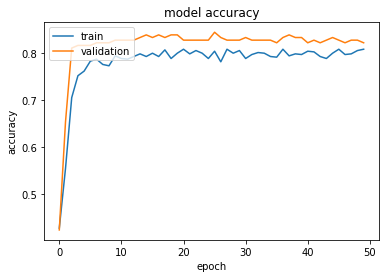

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Sometimes, simplest model is the best one to pick. Here we can see, a simple Logistic Regression Model is performing as good as a complicated deep neural network model. It's totally upto to the selector to decide which one to use in the end.